In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cmocean

from datetime import datetime, timedelta

# Plot temperature, salinity and diffusivity from GOTM data

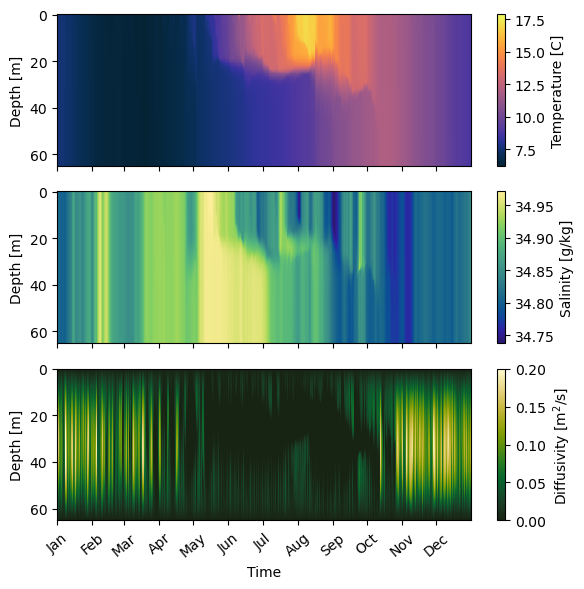

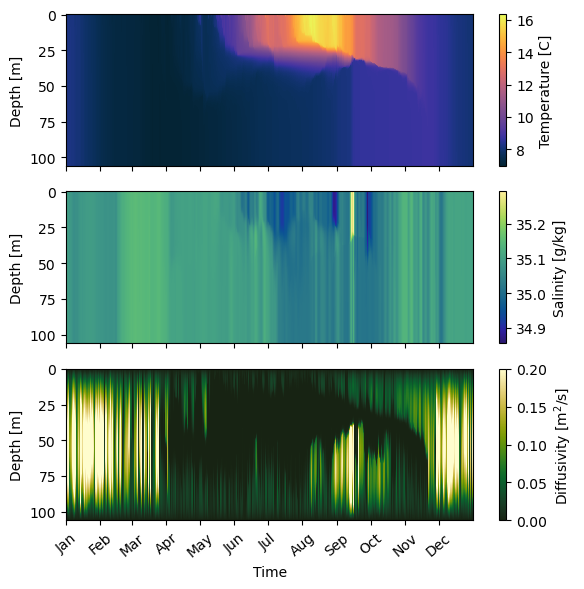

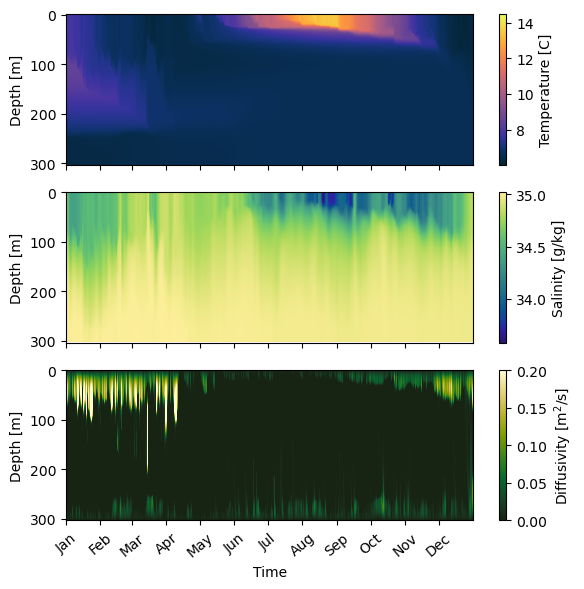

In [2]:
for case in [1,2,3]:
    with nc.Dataset(f'../data/station{case}/case{case}.nc') as d:
        fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize = (6,6))

        # Construct timestamps by an ugly hack
        # (the .units[-19:] part extracts the reference time from "seconds since ...")
        time = np.datetime64(d.variables['time'].units[-19:]) + np.timedelta64(1, 's') * d.variables['time'][:]

        # Plot temperature
        m0 = ax[0].pcolormesh(time, -d.variables['z'][0,:,0,0], d.variables['temp'][:,:,0,0].T, shading='nearest', cmap=cmocean.cm.thermal)
        plt.colorbar(m0, ax=ax[0], label='Temperature [C]')
        # Plot salinity
        m1 = ax[1].pcolormesh(time, -d.variables['z'][0,:,0,0], d.variables['salt'][:,:,0,0].T, shading='nearest', cmap=cmocean.cm.haline)
        plt.colorbar(m1, ax=ax[1], label='Salinity [g/kg]')
        # Plot diffusivity
        m2 = ax[2].pcolormesh(time, -d.variables['zi'][0,:,0,0], d.variables['nus'][:,:,0,0].T, shading='nearest', cmap=cmocean.cm.speed_r, vmax=0.2)
        cbar = plt.colorbar(m2, ax=ax[2], label='Diffusivity [m$^2$/s]')

        # Set xlim to cover 2019 only
        ax[2].set_xlim(datetime(2019, 1, 1), datetime(2020, 1, 1))
        # Set ticks and labels
        ticks = [datetime(2019, m, 1) for m in range(1, 13)]
        ticklabels = [t.strftime('%b') for t in ticks]
        ax[2].set_xticks(ticks)
        ax[2].set_xticklabels(ticklabels, rotation=40)
        ax[2].set_xlabel('Time')
        for a in ax:
            a.set_ylabel('Depth [m]')
        # Flip y-axis to get bottom on the bottom and surface on top
        ax[2].set_ylim(ax[2].get_ylim()[::-1])
        plt.tight_layout()
        
        #plt.savefig(f'station{case}_T_S_K.png', dpi=240)